# Waveform / STFT / Mel Sepctrogram / Chroma / FFT (linear, log)

##### Waveform : 
##### STFT : 데이터에서 시간에 대해 구간을 짧게 나누어 나누어진 여러 구간의 데이터를 각각 푸리에 변환하는 방법. STFT의 경우에는 n초 구간을 임의의 크기로 나누어(Ex. 0~3초 사이, 3~6초 사이, 6~n초 사이로 나눔) 나누어진 데이터를 각각 푸리에 변환하는 것. 
##### FFT :  n초 길이 전체에 대해 푸리에 변환을 하는 것.  FFT는 고속 푸리에 변환 알고리즘을 통해 이산 푸리에 변환 (DFT)을 연산하는 것. (함수의 주파수 성분을 분석하는 용도로 널리 쓰이고 있다. 특히, 공학에서 소리, 진동이나 전기 전자에서 파형 및 노이즈 분석 등에 이르기 까지 매우 다양한 분야에서 활용되고 있음)
##### Mel spectrogram : 사람들은 음성 신호를 인식할 때 주파수를 linear scale로 인식하는게 아님. 500 ~ 1000 Hz (낮은주파수) 가 바뀌는건 예민하게 인식하는데 10000Hz ~ 20000 Hz(높은 주파수)가 바뀌는 것은 잘 인식 못함. 그래서 이 주파수를 mel scale로 볼 수 있게 한 것
##### Chroma : 음악 신호의 주파수 스펙트럼을 12개의 피치 클래스(pitch class)로 축소한 것. 이는 음악의 화음, 코드, 멜로디 분석에 유용. 크로마 피처는 주로 12개의 반음(반음계)을 기반으로 하여 각 시간 프레임에서의 음조(pitch)를 나타냄.

In [1]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

In [2]:
!pip install sounddevice

In [124]:
audio_data = 'E:/IoT/한국어음성01/KsponSpeech_006014.wav'

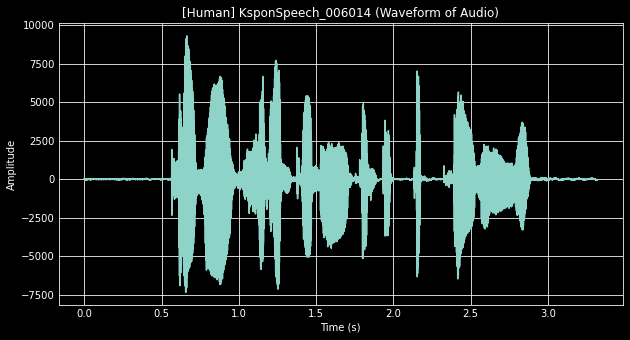

In [125]:
#Waveform

import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

# Load audio data
sample_rate, audio = wavfile.read(audio_data)

# Create time axis
time = np.arange(0, len(audio)) / sample_rate

plt.figure(figsize=(8, 4))
plt.grid(True)

# Plot waveform
plt.style.use('dark_background')
plt.plot(time, audio)#, 'tomato') #토마토는 색깔 이름
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('[Human] KsponSpeech_006014 (Waveform of Audio)')
plt.show()

In [126]:
# 오디오 파일 로드
y, sr = librosa.load(audio_data)

# Short-Time Fourier Transform (STFT) 계산
D = librosa.stft(y)

# Amplitude를 dB 스케일로 변환
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

In [127]:
M = librosa.feature.melspectrogram(y=y, sr=sr)
M_db = librosa.power_to_db(M, ref=np.max)
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)

C:\Users\celin\AppData\Local\Temp\ipykernel_16560\3826770098.py:31: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(img1, ax=[ax[0], ax[1]])
C:\Users\celin\AppData\Local\Temp\ipykernel_16560\3826770098.py:34: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(img3, ax=[ax[2]])


[(1.0, 3.0)]

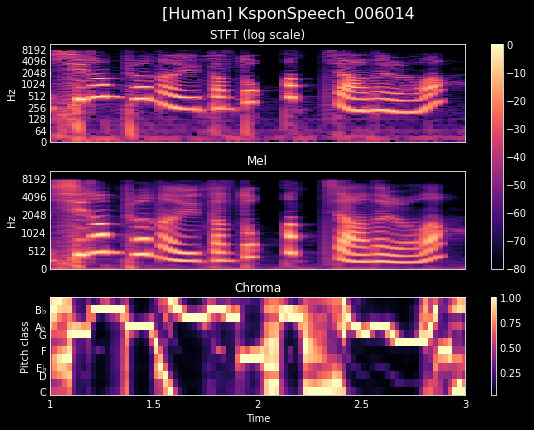

In [128]:
# Construct a subplot grid with 3 rows and 1 column, sharing the x-axis)
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(8, 6))


# On the first subplot, show the original spectrogram
img1 = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax[0])
ax[0].set(title='STFT (log scale)')

# On the second subplot, show the mel spectrogram
img2 = librosa.display.specshow(M_db, x_axis='time', y_axis='mel', ax=ax[1])
ax[1].set(title='Mel')

# On the third subplot, show the chroma features
img3 = librosa.display.specshow(chroma, x_axis='time', y_axis='chroma',
                                key='Eb:maj', ax=ax[2])
ax[2].set(title='Chroma')

# To eliminate redundant axis labels, we'll use "label_outer" on all subplots:
for ax_i in ax:
    ax_i.label_outer()
    
    
#plt.style.use('dark_background') ## Human 할 때 활성화!!!!!!!!!!!!!! 검정 배경임     
#plt.style.use('grayscale') ## AI 할 때 활성화!!!!!!!!!!!!!! 회색 배경임 
    
fig.suptitle('[Human] KsponSpeech_006014', fontsize=16)
    
fig.tight_layout(pad=0.7) 

# And we can share colorbars:
fig.colorbar(img1, ax=[ax[0], ax[1]])

# Or have individual colorbars:
fig.colorbar(img3, ax=[ax[2]])


# We can then even do fancy things like zoom into a particular time and frequency
# region.  Since the axes are shared, this will apply to all three subplots at once.
ax[0].set(xlim=[1, 3])  # Zoom to seconds 1-3

C:\Users\celin\AppData\Local\Temp\ipykernel_16560\2471145598.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(img, ax=ax)


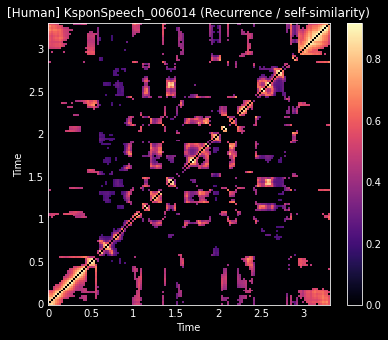

In [129]:
R = librosa.segment.recurrence_matrix(chroma, mode='affinity')
fig, ax = plt.subplots(figsize=(5, 4))

#plt.style.use('dark_background') ## Human 할 때 활성화!!!!!!!!!!!!!! 검정 배경임     
#plt.style.use('_mpl-gallery') ## AI 할 때 활성화!!!!!!!!!!!!!! 회색 배경임 

img = librosa.display.specshow(R, y_axis='time', x_axis='time', ax=ax)
ax.set(title='[Human] KsponSpeech_006014 (Recurrence / self-similarity)')
fig.colorbar(img, ax=ax)

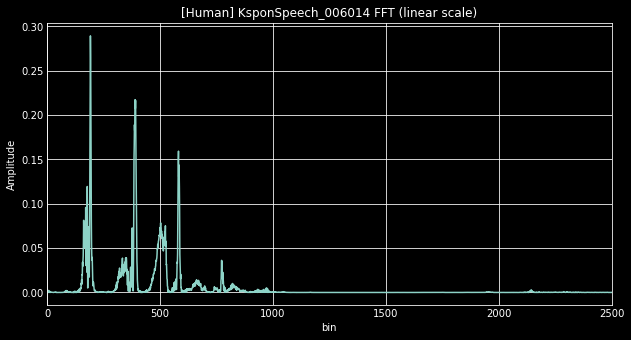

In [130]:
# FFT (linear scale)

import matplotlib.pyplot as plt
import librosa
import numpy as np

wav, sr = librosa.load(audio_data,sr=16000)

# 음원에서 FFT 시작점, N-point는 320 (나는 10000)
start = int(sr * 0.3)
end = start + 10000
wav = wav[start:end]

signal = np.fft.fft(wav)
signal = signal ** 2 / len(signal)
#print(signal)


plt.figure(figsize=(8, 4))
plt.grid()

plt.plot(abs(signal))#, 'tomato')
### AI 때는 tomato // Human 때는 x
plt.xlabel("bin")
plt.xlim(0, int(len(signal)/4)) #4는 내가 설정한 숫자임. x축이 불필요하게 길어지길래.
plt.ylabel("Amplitude")
plt.title("[Human] KsponSpeech_006014 FFT (linear scale)")
plt.grid()
plt.show()

C:\Users\celin\AppData\Local\Temp\ipykernel_16560\1001654714.py:16: UserWarning: power_to_db was called on complex input so phase information will be discarded. To suppress this warning, call power_to_db(np.abs(D)**2) instead.
  signal = librosa.power_to_db(signal)


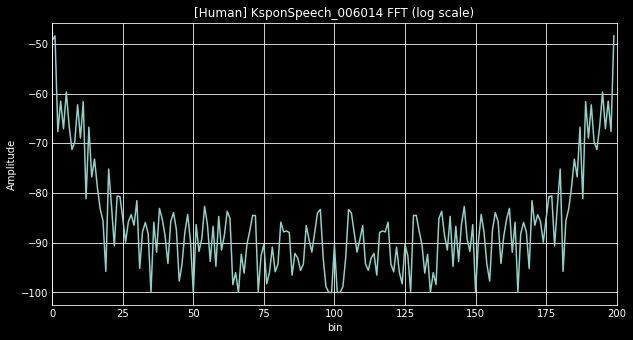

In [131]:
# FFT (log scale)

import matplotlib.pyplot as plt
import librosa
import numpy as np

wav, sr = librosa.load(audio_data,sr=16000)

# 음원에서 FFT 시작점, N-point는 320 
start = int(sr * 0.3)
end = start + 200
wav = wav[start:end]

signal = np.fft.fft(wav)
signal = signal ** 2 / len(signal)
signal = librosa.power_to_db(signal)


plt.figure(figsize=(8, 4))
plt.grid()

plt.plot(signal)#, 'tomato')
### AI 때는 tomato // Human 때는 x
plt.xlabel("bin")
plt.xlim(0, int(len(signal)))
plt.ylabel("Amplitude")
plt.title("[Human] KsponSpeech_006014 FFT (log scale)")
plt.grid()
plt.show()

In [89]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
